In [1]:
from Embedtest import OASDBDesc
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import ablang
from sklearn.preprocessing import StandardScaler

2023-04-24 15:04:01 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [2]:
#!pip install ablang

In [3]:
ls ../Desktop/

merck/


In [4]:
!pwd

/Users/cherylliu/Desktop/ds_discovery/MerckEDA-main/EmbedTest


In [5]:
!ls PATH_TO_GZ_FILE_IS

ls: PATH_TO_GZ_FILE_IS: No such file or directory


In [6]:
# obj_oasdb = OASDBDesc()
# big_df = obj_oasdb.read_data("/Users/cherylliu/Desktop/ds_discovery/datasets")

In [7]:
# sampled_df = big_df.sample(2000)
# sampled_df

In [8]:
#sampled_df.to_csv('sampled_df_2000.csv', index = False)

In [9]:
#obj_oasdb.perform_random_sample(big_df, 10, 2000)

In [10]:
obj_oasdb = OASDBDesc()
sampled_df = pd.read_csv("/Users/cherylliu/Desktop/ds_discovery/sampled_df.csv")
sampled_df

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AGCAGCCTCCTGCAGG-1_contig_2,ATCATCCAACAGCCACATCCCTTCTCTACAGAAGCCTCTGAGAGGA...,H,F,T,F,T,F,T,IGHV1-46*01,...,404.0,GAA,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1,ACCCACTTCAGTCCCT-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-30*02,...,381.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
2,ACGAGGAGTAGAAGGA-1_contig_1,ACATGGGAAGTGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAAC...,H,F,T,F,T,F,T,IGHV4-34*01,...,400.0,GA,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
3,ACACCGGCATGGTAGG-1_contig_1,AGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCAC...,H,F,T,F,T,F,T,IGHV3-48*03,...,395.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'A', '4 ...",|||||
4,GATCGATTCAAAGTAG-1_contig_1,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,379.0,C,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
5,CGGAGTCTCGCCGTGA-1_contig_1,ATTCTTTTTTCTTTTCTGGGGATGCTTTCTGAGAGTCATGGATCTC...,H,F,T,F,T,F,T,IGHV4-39*01,...,411.0,C,1.0,NaN,NaN,CGGTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
6,GAGGTGATCAACACCA-1_contig_2,GGGATCACACAACAGCCACATCCCTCCCCTACAGAAGCCCCCAGAG...,H,F,T,F,T,F,T,IGHV1-24*01,...,391.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
7,CACAAACTCAATAAGG-1_contig_1,TGGGGCTTTCTGAGAGTCATGGACCTCCTGTGCAAGAACATGAAGC...,H,F,T,F,T,F,T,IGHV4-38-2*01,...,392.0,GAC,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
8,GATCGCGTCAGAGGTG-1_contig_2,AGCATCACGTAACAACCAGATTCCTCCTCTAAAGAAGCCCCTGGGA...,H,F,T,F,T,F,F,IGHV1-69*09,...,404.0,A,1.0,NaN,NaN,GTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
9,GCTTGAACACAGGAGT-1_contig_1,GGGGACTTTCTGAGACTCATGGACCTCCTGCACAAGAACATGAAAC...,H,F,T,F,T,F,T,IGHV4-4*07,...,395.0,GGGGCCTA,8.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||


## physchemvh_gen Clustering

In [11]:
heavy_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_heavy")

In [12]:
heavy_chain

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,7.0,2.0,4.0,4.0,4.0,14.0,3.0,3.0,5.0,8.0,...,15.0,13.0,10.0,4.0,8.0,32.0,15.0,42.0,22.0,-0.353913
1,8.0,4.0,6.0,4.0,4.0,17.0,1.0,3.0,6.0,9.0,...,15.0,8.0,11.0,5.0,12.0,35.0,20.0,39.0,25.0,-0.389565
2,7.0,2.0,3.0,3.0,3.0,12.0,3.0,4.0,5.0,10.0,...,19.0,9.0,8.0,5.0,10.0,32.0,15.0,41.0,18.0,-0.386087
3,8.0,2.0,5.0,5.0,3.0,13.0,0.0,3.0,4.0,10.0,...,17.0,6.0,9.0,3.0,9.0,33.0,14.0,36.0,19.0,-0.225217
4,7.0,2.0,7.0,3.0,4.0,12.0,1.0,2.0,5.0,6.0,...,12.0,12.0,10.0,4.0,9.0,29.0,16.0,40.0,23.0,-0.541739
5,7.0,2.0,2.0,6.0,4.0,11.0,0.0,4.0,2.0,12.0,...,23.0,11.0,6.0,6.0,5.0,33.0,13.0,48.0,18.0,-0.311304
6,8.0,2.0,6.0,8.0,2.0,13.0,1.0,1.0,6.0,7.0,...,11.0,14.0,12.0,3.0,10.0,30.0,18.0,40.0,25.0,-0.433913
7,6.0,2.0,3.0,3.0,2.0,11.0,1.0,5.0,5.0,10.0,...,20.0,12.0,10.0,4.0,9.0,33.0,13.0,42.0,14.0,-0.091304
8,9.0,4.0,4.0,5.0,3.0,11.0,2.0,4.0,6.0,5.0,...,19.0,9.0,13.0,3.0,7.0,34.0,13.0,46.0,25.0,-0.445217
9,6.0,2.0,4.0,3.0,2.0,14.0,2.0,5.0,5.0,9.0,...,19.0,11.0,10.0,5.0,7.0,32.0,15.0,45.0,20.0,-0.305217


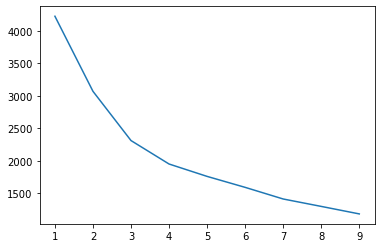

In [13]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

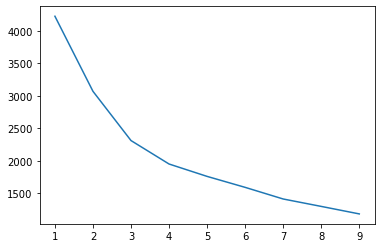

In [14]:
plt.plot(obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_elbow(heavy_chain, 10)[1])

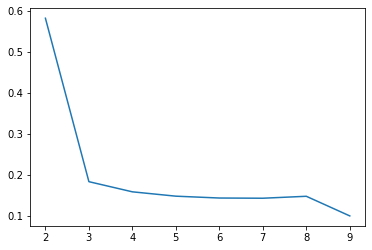

In [15]:
plt.plot(obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[0], obj_oasdb.best_num_cluster_sil(heavy_chain, 10)[1])

## physchemvh_gen PCA

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

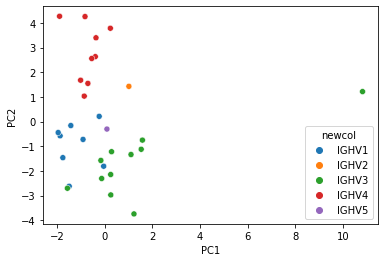

In [16]:
pca1 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['v_call_heavy']], 'v_call_heavy' )
sns.scatterplot(data = pca1, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

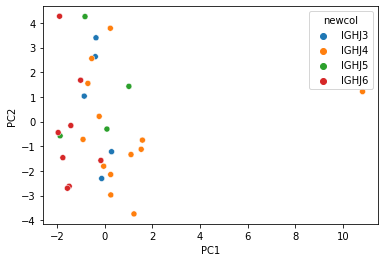

In [17]:
pca2 = obj_oasdb.pca_analysis(heavy_chain,sampled_df[['j_call_heavy']], 'j_call_heavy' )
sns.scatterplot(data = pca2, x = 'PC1', y = 'PC2', hue = 'newcol')

In [18]:
light_chain = obj_oasdb.physchemvh_gen(sampled_df, "sequence_alignment_aa_light")
light_chain.head()

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,8.0,2.0,4.0,5.0,4.0,9.0,0.0,4.0,4.0,10.0,...,14.0,9.0,4.0,2.0,6.0,30.0,8.0,35.0,19.0,-0.427826
1,8.0,2.0,4.0,2.0,5.0,9.0,0.0,6.0,4.0,7.0,...,18.0,9.0,4.0,2.0,4.0,30.0,7.0,41.0,14.0,-0.246087
2,9.0,2.0,1.0,5.0,4.0,9.0,0.0,5.0,3.0,7.0,...,15.0,10.0,5.0,2.0,5.0,30.0,8.0,40.0,15.0,-0.328696
3,7.0,2.0,4.0,3.0,2.0,14.0,1.0,2.0,5.0,6.0,...,19.0,8.0,8.0,1.0,7.0,25.0,9.0,39.0,16.0,-0.428696
4,4.0,2.0,4.0,5.0,5.0,8.0,2.0,6.0,7.0,8.0,...,18.0,11.0,5.0,1.0,4.0,28.0,5.0,40.0,20.0,-0.366087


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

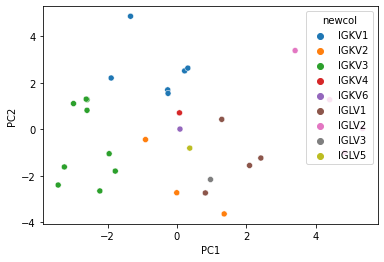

In [19]:
pca1_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = pca1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

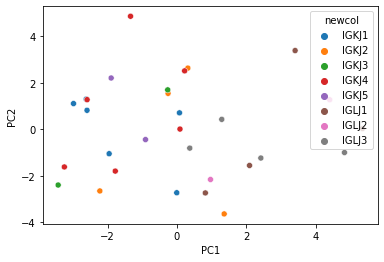

In [20]:
pca2_light = obj_oasdb.pca_analysis(light_chain,sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = pca2_light, x = 'PC1', y = 'PC2', hue = 'newcol')

## ablang PCA

In [21]:
#ablang_encode_seq
seqs_light, seqs_heavy = obj_oasdb.ablang_encode_seq(sampled_df)

In [22]:
seqs_light = pd.DataFrame(seqs_light)

In [23]:
seqs_heavy = pd.DataFrame(seqs_heavy)
seqs_heavy

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.874063,0.068017,-0.306375,-0.084713,-0.246387,0.841816,0.710375,-0.155469,-0.422494,0.085960,...,0.194770,0.755966,0.018049,0.117526,-0.735392,-0.063713,-0.120968,0.190363,0.569465,0.408154
1,-0.661884,0.383054,-0.616962,-0.293082,0.015542,0.646905,0.894830,-0.187842,-0.690751,-0.008104,...,0.639969,0.362363,-0.158793,0.303471,-0.351275,0.150950,0.162908,-0.160897,0.473706,0.888014
2,-0.658116,0.092692,-0.605344,0.049324,0.324287,0.936568,0.525038,-0.241910,-0.238611,0.208364,...,-0.152965,0.569176,0.036255,0.160296,-0.578913,0.005260,-0.319913,0.034127,0.605085,0.681163
3,0.045563,0.680660,-0.612179,-0.106184,-0.636756,0.018161,0.521519,0.230502,-0.778584,0.098090,...,0.261669,-0.333789,-0.245192,0.751463,-0.666012,0.525357,0.391786,-0.412973,0.198172,0.653545
4,-0.385238,-0.672443,-0.653575,0.406752,-0.208126,0.140942,0.619795,0.304525,-0.861493,-0.142657,...,-0.333841,-0.384643,0.138295,-0.229935,-0.364388,0.361702,0.424329,-0.538997,0.077075,0.892826
5,-0.736551,-0.321029,-0.619429,-0.476454,-0.084075,1.007773,0.498136,-0.091870,-0.181303,-0.150232,...,0.009282,0.637265,-0.005537,0.274400,-0.540524,-0.547642,0.215181,0.222602,0.382791,0.567955
6,-0.580010,0.345055,-0.732549,-0.270495,-0.052404,0.620694,0.754321,-0.098137,-0.403383,0.101561,...,0.014432,0.521747,-0.136366,0.037721,-0.374094,-0.201427,0.063679,-0.014286,0.394848,0.709317
7,-0.527085,0.120344,-0.812155,0.590466,-0.353704,0.271442,0.467029,0.351543,-0.436939,-0.242454,...,0.010943,-0.450141,0.425793,0.067028,-0.951214,0.338167,0.253615,-0.416978,0.315847,0.538769
8,-0.645834,-0.008425,-0.593060,-0.013158,-0.161068,0.754906,0.802537,-0.285316,-0.913203,0.256530,...,0.190312,0.424084,-0.447837,-0.108750,-0.314703,0.004923,0.354803,0.138695,0.437409,0.707054
9,-0.755271,-0.048111,-0.908008,0.402255,0.256314,0.464117,0.380762,-0.189472,-0.567599,-0.088796,...,0.273775,0.415104,0.004441,0.222574,-1.004902,0.023482,0.303798,-0.924292,0.207131,1.137677


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

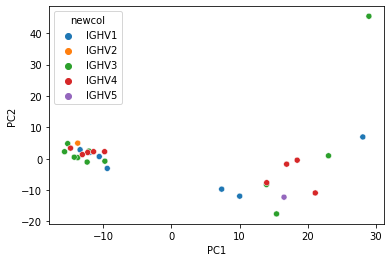

In [24]:
pca1_ablang_heavy = obj_oasdb.pca_analysis(seqs_heavy,sampled_df[['v_call_heavy']], 'v_call_heavy' )
sns.scatterplot(data = pca1_ablang_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

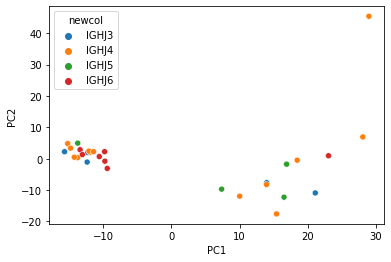

In [25]:
pca2_ablang_heavy = obj_oasdb.pca_analysis(seqs_heavy,sampled_df[['j_call_heavy']], 'j_call_heavy' )
sns.scatterplot(data = pca2_ablang_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

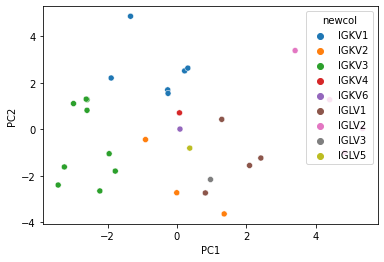

In [26]:
pca1_ablang_light = obj_oasdb.pca_analysis(seqs_light, sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = pca1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

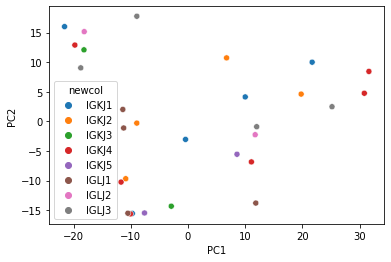

In [27]:
pca2_ablang_light = obj_oasdb.pca_analysis(seqs_light,sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = pca2_ablang_light, x = 'PC1', y = 'PC2', hue = 'newcol')

## physchemvh_gen tsne

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

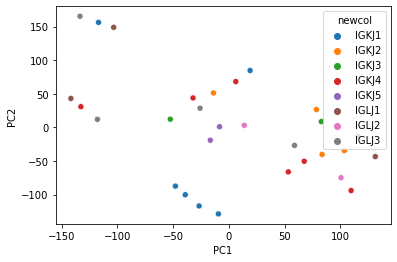

In [29]:
tsne1_heavy = obj_oasdb.tsne_analysis(heavy_chain, sampled_df[['j_call_heavy']], 'j_call_heavy')
sns.scatterplot(data = tsne1_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

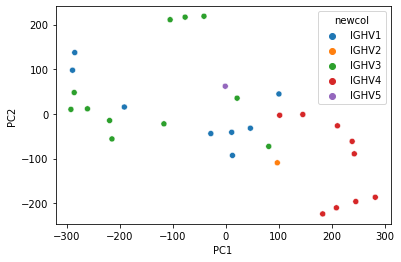

In [30]:
tsne2_heavy = obj_oasdb.tsne_analysis(heavy_chain, sampled_df[['v_call_heavy']], 'v_call_heavy')
sns.scatterplot(data = tsne2_heavy, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

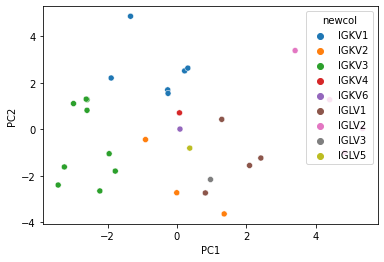

In [31]:
tsne1_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['v_call_light']], 'v_call_light' )
sns.scatterplot(data = tsne1_light, x = 'PC1', y = 'PC2', hue = 'newcol')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

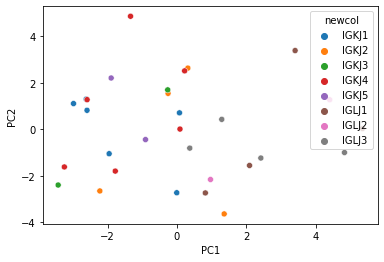

In [32]:
tsne2_light = obj_oasdb.pca_analysis(light_chain , sampled_df[['j_call_light']], 'j_call_light' )
sns.scatterplot(data = tsne2_light, x = 'PC1', y = 'PC2', hue = 'newcol')